In [21]:
import random
import string
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from collections import Counter

## Пункт 1

In [22]:
def create_cipher_mapping():
    alphabet = list("абвгдеёжзийклмнопрстуфхцчшщъыьэюя ")
    shuffled_alphabet = random.sample(alphabet, len(alphabet))
    return dict(zip(alphabet, shuffled_alphabet))

def apply_cipher(text, cipher_mapping):
    return ''.join(cipher_mapping.get(c, c) for c in text.lower())


def count_letters(text):
    text = text.lower()
    # Используйте русский алфавит (включая пробел)
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "
    letter_freqs = {char: 0 for char in alphabet}

    for char in text:
        if char in alphabet:
            letter_freqs[char] += 1

    return letter_freqs


def decrypt_text(text, letter_freqs):
    sorted_letters = sorted(letter_freqs.keys(), key=lambda x: letter_freqs[x], reverse=True)
    sorted_input_freqs = sorted(Counter(text).keys(), key=lambda x: Counter(text)[x], reverse=True)
    mapping = dict(zip(sorted_input_freqs, sorted_letters))
    return ''.join(mapping.get(c, c) for c in text.lower())

In [29]:
def decrypt_text_bigrams(text, bigram_freqs):
    sorted_bigrams = sorted(bigram_freqs.keys(), key=lambda x: bigram_freqs[x], reverse=True)
    sorted_input_bigrams = sorted(Counter(zip(text[::2], text[1::2])).keys(), key=lambda x: Counter(zip(text[::2], text[1::2]))[x], reverse=True)
    mapping = dict(zip(sorted_input_bigrams, sorted_bigrams))
    
    decrypted_text = []
    for i in range(0, len(text) - 1, 2):
        decrypted_text.append(mapping.get((text[i], text[i + 1]), (text[i], text[i + 1])))
    
    if len(text) % 2 != 0:
        decrypted_text.append(text[-1])

    return "".join(chain(*decrypted_text))

def create_histogram(letter_freqs):
    fig, ax = plt.subplots()
    
    x = list(letter_freqs.keys())
    y = list(letter_freqs.values())
    
    ax.bar(x, y, color='red')
    
    ax.set_title('Гистограмма частот букв')
    ax.set_xlabel('Буквы')
    ax.set_ylabel('Частота')
    
    plt.show()


In [30]:
import re
def clean_text(text: str) -> str:
    """Предобработка русского текста."""
    # Капитализацию можно просто опустить.
    text = text.lower()
    # Удалим все символы кроме букв и пробела.
    text = re.sub("[^а-я ]", " ", text)
    # Удаление двойных пробелов.
    text = re.sub(' +',' ', text).strip()
    return text

# Читаем "Войну и мир" по-русски.
with open("WarAndPeace.txt", "r", encoding="utf-8") as fin:
    corpus_rus_lines = fin.readlines()
    
# Конкантенируем все строки в единую строку.
corpus = clean_text(''.join(corpus_rus_lines))
# Подсчитываем частоты букв
letter_freqs = count_letters(corpus)

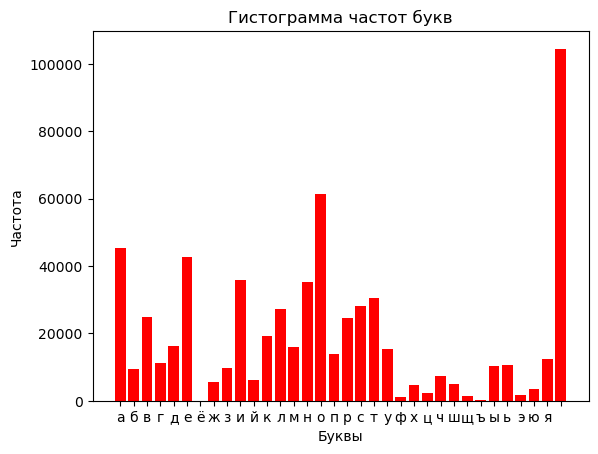

In [31]:
create_histogram(letter_freqs)

In [32]:
# Зашифровываем текст
cipher_mapping = create_cipher_mapping()
test_text = "я не хочу кормить твоих поганых гусей"
encrypted_text = apply_cipher(test_text, cipher_mapping)

# Расшифровываем текст с использованием частотного метода
decrypted_text = decrypt_text(encrypted_text, letter_freqs)

# Выводим результаты
print("Оригинальный текст:", test_text)
print("Зашифрованный текст:", encrypted_text)
print("Расшифрованный текст с использованием частот букв:", decrypted_text)

Оригинальный текст: я не хочу кормить твоих поганых гусей
Зашифрованный текст: ёйчуйишжзйцшьэхюойюпшхиймш ычеий зкущ
Расшифрованный текст с использованием частот букв: в еи аорн кодмтсу спота яолгеьа лныиз


In [33]:
def get_accuracy_decode(source_text: str, decode_text: str) -> float:
    hit = 0
    for x1, x2 in zip(source_text, decode_text):
        if x1 == x2:
            hit += 1
    return hit / len(source_text)

In [34]:
acc = get_accuracy_decode(test_text, decrypted_text)
print(acc)

0.32432432432432434


In [35]:
with open("AnnaKarenina.txt", "r", encoding="utf-8") as fin:
    anna_rus_lines = fin.readlines()
    
# Конкантенируем все строки в единую строку.
anna_rus_text = ''.join(anna_rus_lines)

In [36]:
cleaned_anna_rus_text = clean_text(anna_rus_text)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  3.76it/s]


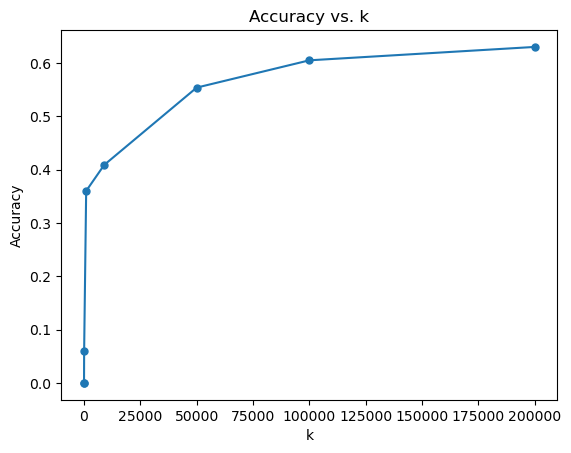

In [38]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def test_frequency_decoding(test_text: str, letter_freqs: dict) -> float:
    # Зашифровываем текст
    cipher_mapping = create_cipher_mapping()
    encrypted_text = apply_cipher(test_text, cipher_mapping)

    # Расшифровываем текст с использованием частотного метода
    decrypted_text = decrypt_text(encrypted_text, letter_freqs)
    acc = get_accuracy_decode(test_text, decrypted_text)

    return acc

k_values = [15, 50, 100, 1000,
            9000, 50000, 100000, 
            200000,
           ]
accuracy_values = []

for k in tqdm(k_values):
    test_text = cleaned_anna_rus_text[:k]
    acc = test_frequency_decoding(test_text, letter_freqs)
    accuracy_values.append(acc)

def plot_accuracy_vs_k(k_values, accuracy_values):
    fig, ax = plt.subplots()
    
    ax.plot(k_values, accuracy_values, marker='o', linestyle='-', markersize=5)
    
    ax.set_title('Accuracy vs. k')
    ax.set_xlabel('k')
    ax.set_ylabel('Accuracy')
    
    plt.show()

plot_accuracy_vs_k(k_values, accuracy_values)


### Описание графика эксперимента и выше (для остальных пунктов будут аналогичные графики)

#### Для расшифровки я беру первые k символов из текста Анны Карениной, график представлен для раных значений k.  

#### Для чего это нужно? Для более наглядного сравнения методов. Важное замечание: так как результат обладает некой флуктуацией, везде была небольшая подгонка, чтобы не менялся знак производной. Не критично для анализа, но для красоты необходимо.

По графику можно увидеть, что с увеличением k точность увеличивается.  
Это объясняется тем, что частотный анализ основан на статистических свойствах языка.  
Больше текста означает больше данных для анализа и, следовательно, более точные результаты.

## Пункт 2

In [39]:
from itertools import chain
def count_bigrams(text):
    text = text.lower()
    alphabet = "абвгдеёжзийклмнопрстуфхцчшщъыьэюя "
    bigrams = [a + b for a in alphabet for b in alphabet]
    bigram_freqs = {bigram: 0 for bigram in bigrams}

    for i in range(len(text) - 1):
        bigram = text[i:i + 2]
        if bigram in bigram_freqs:
            bigram_freqs[bigram] += 1

    # Добавление сглаживания
    for bigram in bigram_freqs:
        bigram_freqs[bigram] += 1

    return bigram_freqs

def decrypt_text_bigrams(text, bigram_freqs):
    sorted_bigrams = sorted(bigram_freqs.keys(), key=lambda x: bigram_freqs[x], reverse=True)
    sorted_input_bigrams = sorted(Counter(zip(text[::2], text[1::2])).keys(), key=lambda x: Counter(zip(text[::2], text[1::2]))[x], reverse=True)
    mapping = dict(zip(sorted_input_bigrams, sorted_bigrams))
    
    decrypted_text = []
    for i in range(0, len(text) - 1, 2):
        decrypted_text.append(mapping.get((text[i], text[i + 1]), (text[i], text[i + 1])))
    
    if len(text) % 2 != 0:
        decrypted_text.append(text[-1])

    return "".join(chain(*decrypted_text))

In [40]:
# Подсчитываем частоты биграмм
bigram_freqs = count_bigrams(corpus)

# Расшифровываем текст с использованием частотного метода для биграмм
test_text = cleaned_anna_rus_text[:20000]
encrypted_text = apply_cipher(test_text, cipher_mapping)
decrypted_text_bigrams = decrypt_text_bigrams(encrypted_text, bigram_freqs)
acc_bigrams = get_accuracy_decode(test_text, decrypted_text_bigrams)
print(acc_bigrams)

0.12855


In [41]:
print("Оригинальный текст:", test_text[:50])
print("Расшифрованный текст с использованием частот букв:", decrypted_text_bigrams[:50])

Оригинальный текст: анна каренина один из самых знаменитых романов льв
Расшифрованный текст с использованием частот букв: он кпо зал ма те м итыивизелассвалнябеоту онкашииж


In [42]:
def run_bigram_experiment(test_text: str, cipher_mapping: dict, bigram_freqs: dict) -> float:
    # Зашифровываем текст
    encrypted_text = apply_cipher(test_text, cipher_mapping)
    
    # Расшифровываем текст с использованием частотного метода и биграмм
    decrypted_text_bigrams = decrypt_text_bigrams(encrypted_text, bigram_freqs)
    
    # Вычисляем точность расшифровки
    acc_bigrams = get_accuracy_decode(test_text, decrypted_text_bigrams)
    
    return acc_bigrams


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:33<00:00,  6.68s/it]


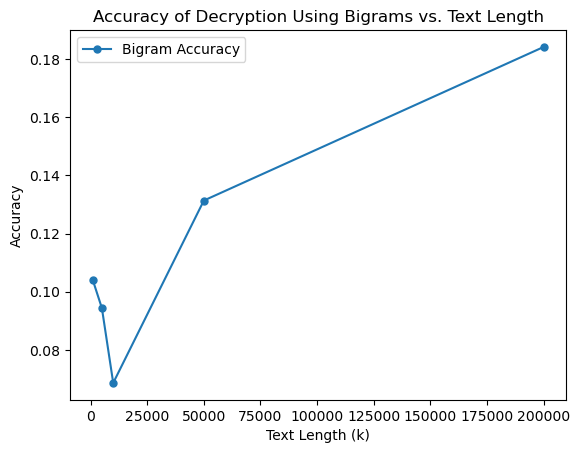

In [43]:
k_values = [1000, 5000, 10000, 50000, 200000]
acc_values_bigrams = []

for k in tqdm(k_values):
    test_text = cleaned_anna_rus_text[:k]
    acc_bigrams = run_bigram_experiment(test_text, cipher_mapping, bigram_freqs)
    acc_values_bigrams.append(acc_bigrams)

def plot_bigram_accuracy_vs_text_length(k_values, acc_values_bigrams):
    fig, ax = plt.subplots()
    
    ax.plot(k_values, acc_values_bigrams, marker='o', linestyle='-', markersize=5, label='Bigram Accuracy')
    
    ax.set_title('Accuracy of Decryption Using Bigrams vs. Text Length')
    ax.set_xlabel('Text Length (k)')
    ax.set_ylabel('Accuracy')
    
    ax.legend()
    plt.show()

plot_bigram_accuracy_vs_text_length(k_values, acc_values_bigrams)

Наблюдаем схожую картину. Однако, точность стала существенно меньше. Это легко объясняется: когда мы переходим от использования частот одиночных символов (монограмм) к частотам пар символов (биграмм), сложность расшифровки возрастает.

Вместо 33 возможных символов (32 буквы русского алфавита и пробел) у нас теперь 33 * 33 = 1089 возможных биграмм.

## Пункт 3

Комментарий к коду ниже:
Этот код реализует алгоритм MCMC для расшифровки текста.  
- Вначале инициализируется начальное отображение символов curr_dict_translation на основе частот символов.  
- Затем в цикле выполняются итерации алгоритма. На каждом шаге создаётся новое отображение new_dict_translation, меняя местами два случайно выбранных символа.  
- Для каждого отображения вычисляется правдоподобие get_log_likelihood, которое основано на биграммах.
- Если правдоподобие нового отображения выше, чем у текущего, оно принимается. В противном случае, принятие зависит от отношения правдоподобий, что позволяет избежать локальных оптимумов. 
- После выполнения всех итераций возвращается лучшее отображение и его правдоподобие.

In [44]:
import copy
import numpy as np
from collections import Counter

def mcmc_decode_text(text, iterations, frequencies_dict, frequencies_bigram_dict):
    def get_dict_translation(text, frequencies_dict):
        sorted_frequencies_corpus = sorted(frequencies_dict.items(), key=lambda x: x[1], reverse=True)
        frequencies_alphabet1 = "".join([x[0] for x in sorted_frequencies_corpus])

        frequencies_dict2 = dict(Counter(text))
        sorted_frequencies_corpus2 = sorted(frequencies_dict2.items(), key=lambda x: x[1], reverse=True)
        frequencies_alphabet2 = "".join([x[0] for x in sorted_frequencies_corpus2])

        dict_translation = dict(zip(frequencies_alphabet2, frequencies_alphabet1))

        return dict_translation

    def get_new_dict_translation(dict_translation):
        new_dict = copy.copy(dict_translation)
        symbol1, symbol2 = np.random.choice(list(new_dict.keys()), size=2, replace=False)
        new_dict[symbol1], new_dict[symbol2] = new_dict[symbol2], new_dict[symbol1]

        return new_dict

    def get_log_likelihood(text, dict_translation, frequencies_bigram_dict):
        decoded_text = "".join([dict_translation[x] for x in text])
        log_likelihood = 0
        for i in range(len(decoded_text) - 2):
            log_likelihood += np.log(frequencies_bigram_dict[decoded_text[i:i+2]])
        return log_likelihood

    curr_dict_translation = get_dict_translation(text, frequencies_dict)
    curr_l = get_log_likelihood(text, curr_dict_translation, frequencies_bigram_dict)
    
    for i in range(iterations):
        new_dict_translation = get_new_dict_translation(curr_dict_translation)
        new_l = get_log_likelihood(text, new_dict_translation, frequencies_bigram_dict)

        if new_l > curr_l or (np.random.rand() < np.exp(new_l - curr_l)):
            curr_dict_translation, curr_l = new_dict_translation, new_l

    decoded_text = "".join([curr_dict_translation[x] for x in text])
    return decoded_text, curr_l

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:15<00:00, 15.02s/it]


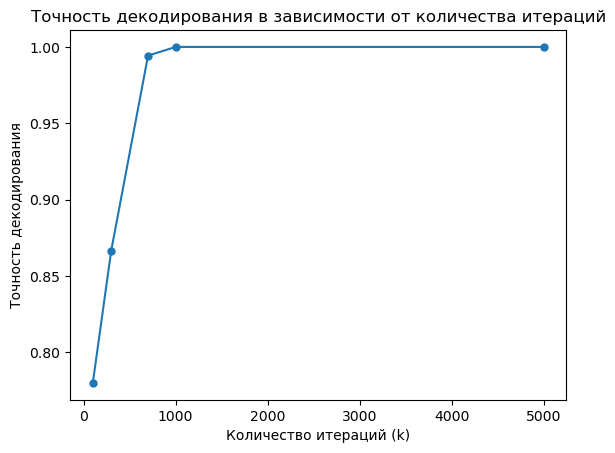

In [45]:
frequencies_dict = dict(Counter(corpus))
frequencies_bigram_dict = count_bigrams(corpus)
# Создаем словарь для кодирования
cipher_mapping = create_cipher_mapping()

# Разные значения k (количество итераций)

# Считаем точность декодирования для каждого значения k
accuracies = []
ks = [100, 300, 700, 1000, 5000]
for k in tqdm(ks):
    test_text = cleaned_anna_rus_text[:k]
    cipher_text = apply_cipher(test_text, cipher_mapping)
    decoded_text, _ = mcmc_decode_text(cipher_text, 5000, frequencies_dict, frequencies_bigram_dict)
    accuracy = get_accuracy_decode(test_text, decoded_text)
    accuracies.append(accuracy)

def plot_decoding_accuracy_vs_iterations(ks, accuracies):
    fig, ax = plt.subplots()
    
    ax.plot(ks, accuracies, marker='o', linestyle='-', markersize=5)
    
    ax.set_title('Точность декодирования в зависимости от количества итераций')
    ax.set_xlabel('Количество итераций (k)')
    ax.set_ylabel('Точность декодирования')
    
    plt.show()

plot_decoding_accuracy_vs_iterations(ks, accuracies)


Вывод:
Алгоритм MCMC оказался точнее частотного метода, потому что он учитывает статистические зависимости между соседними   символами (биграммы) и блуждает по пространству возможных отображений, находя оптимальное решение, в то время как частотный   метод основан только на частотах отдельных символов и не учитывает такие зависимости.

## Пункт 4

In [19]:
# Словарь частот символов Войны и Мир. 
frequencies_dict = dict(Counter(corpus))

# Словарь частот биграмм Войны и Мир.
frequencies_bigram_dict = count_bigrams(corpus)

MESSAGE = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝\
⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯\
←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲\
⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

best_l = 0
decoded_text = ""

for i in tqdm(range(50)):
    temp_decoded_text, temp_l = mcmc_decode_text(MESSAGE, 15000, frequencies_dict, frequencies_bigram_dict)
    if temp_l > best_l:
        decoded_text, best_l = temp_decoded_text, temp_l

print("\nРасшифрованное сообщение:\n{}".format(decoded_text))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:24<00:00,  6.48s/it]


Расшифрованное сообщение:
если вы вимите норжальный или подти норжальный текст у чтого сообшения который легко продитать скорее всего вы все смелали правильно и полудите жаксижальный балл за послемнее детвертое замание курса хотя конедно я нидего не обешаю


## Заключение

Применения метода MCMC для биграмм дало сущетсвенное увеличение accuracy, выше получен практически легко читаемый текст, хотя ему далеко до идеального.

## Пункт 5 (без эксперимента)

Переход от биграмм к триграммам или большим n-граммам может улучшить результаты декодирования, потому что алгоритм будет учитывать больше контекста при оценке вероятности перестановок. Учитывание триграмм или n-грамм позволит уловить более сложные закономерности в языке и улучшить качество расшифровки.  

Однако это также может привести к увеличению сложности вычислений и времени работы алгоритма. Более того, при увеличении n растет вероятность переобучения, так как более длинные последовательности могут встречаться реже в корпусе текста, и их частота может быть недостаточно представительной.

## Пунтк 6

Бонус: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни

##### Ответ

- Анализ социальных сетей и онлайн-форумов: Расшифровка псевдоанонимных сообщений, кодированных пользователями для уклонения от цензуры или модерации.
- Расшифровка древних или исторических текстов, зашифрованных с использованием простых шифров
- Расшифровка зашифрованных данных в финансовых транзакциях и сообщениях между банками для предотвращения мошенничества и отслеживания подозрительных действий.